In [1]:
from env.edit_photo import PhotoEditor
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
open('dataset/trainTarget_jpg.txt','x') 

<_io.TextIOWrapper name='dataset/trainTarget_jpg.txt' mode='x' encoding='UTF-8'>

In [12]:
with open('dataset/trainTarget.txt') as f :
    tif_images = f.read()
    jpg_images = tif_images.replace('tif','jpg')
with open('dataset/trainTarget_jpg.txt','w+') as f:
    f.write(jpg_images)
    
with open('dataset/trainSource.txt') as f :
    tif_images = f.read()
    jpg_images = tif_images.replace('tif','jpg')
with open('dataset/trainSource_jpg.txt','w+') as f:
    f.write(jpg_images)

In [38]:
image = cv2.imread("sample_images/a0676-kme_609.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
photo_editor = PhotoEditor()
parameters = np.array([0.125, 0.125, 0.375, 0.125, 0., 0.0625, 0.9375, 0.375, 0.0625, 0., 0.125, 0.125])

In [26]:
image.shape

(3032, 2024, 3)

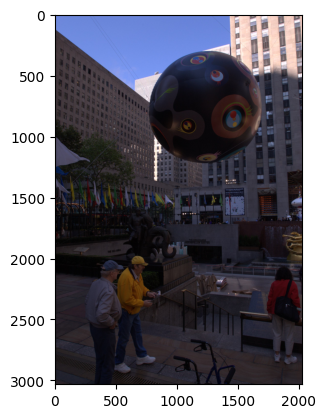

In [39]:
plt.imshow(image)

In [31]:
from PIL import Image

def resize_length(image_array, size=512):
    """
    Resize the longer side of the image to the specified size while maintaining the aspect ratio.

    :param image_array: NumPy array representing the image.
    :param size: The target size for the longer side of the image.
    :return: Resized image as a NumPy array.
    """
    image = Image.fromarray(image_array)
    original_width, original_height = image.size
    if original_width > original_height:
        new_width = size
        new_height = int((original_height / original_width) * size)
    else:
        new_height = size
        new_width = int((original_width / original_height) * size)
    resized_image = image.resize((new_width, new_height), Image.LANCZOS)
    resized_image_array = np.array(resized_image)
    
    return resized_image_array

In [29]:
def resize_length(image,max_length = 512):
    w,h,_ = image.shape
    length = max(w,h)
    length_index = np.argmax(image.shape)
    

In [40]:
input = resize_length(image)
input = input / 255.0

In [41]:
output = photo_editor(input.copy(),parameters.copy())

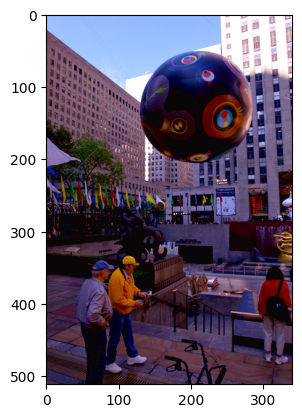

In [42]:
plt.imshow(output)